In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import (LinearRing, LineString, MultiLineString,
                              MultiPoint, MultiPolygon, Point, Polygon)
import io
import sqlalchemy
import numpy as np
import app.main as m
import app.mydef as md
mt=md.MyTools()
import pdfplumber
import app.netools as ant
nt = ant.NetTools()

In [3]:
#导入数据
wenti = pd.read_csv('wenti.csv',encoding = 'gbk')
jizhan= pd.read_csv('jizhan.csv',encoding = 'gbk')

In [7]:
#显示一行数据
display(wenti.head(1),jizhan.head(1))

,问题点变好,名称,经度,纬度,高度,地面海拔,方位角,归属区县,厂家名称
0,460-00-308360-128,汉宜武汉东西湖高桥五路拉远-HFR-1,114.05199,30.62011,0.0,10,0.0,东西湖区,华为


,小区CGI(*),小区中文名,网络制式(TDD/FDD),RRU经度,RRU纬度,天线挂高,方位角,归属区县
0,460-00-438669-4,（D）东西湖移动万科综合楼-HLH-4,TDD,114.19917,30.63062,31.0,0.0,东西湖区


In [8]:
#生成问题点300米的圈
wenti_buff = nt.add_buffer(wenti, coords=['经度', '纬度', '', ''], buff_m=300, has_z=False)

In [9]:
#生成基站数据库为点
jizhan_p = nt.add_points(jizhan, coords=['RRU经度', 'RRU纬度', '', ''], has_z=False)

In [10]:
#找圈内的点
res = gpd.sjoin(wenti_buff,jizhan_p)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2287: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


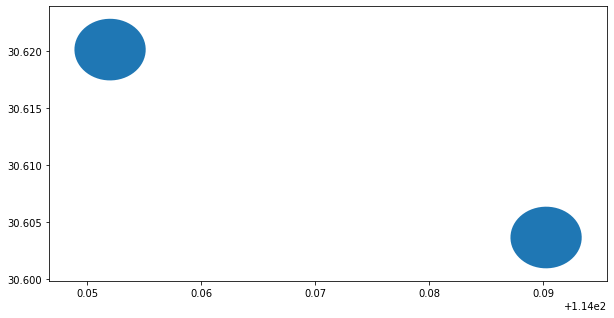

In [22]:
#圈显示前2条
wenti_buff.head(2).plot(figsize=(10, 10))

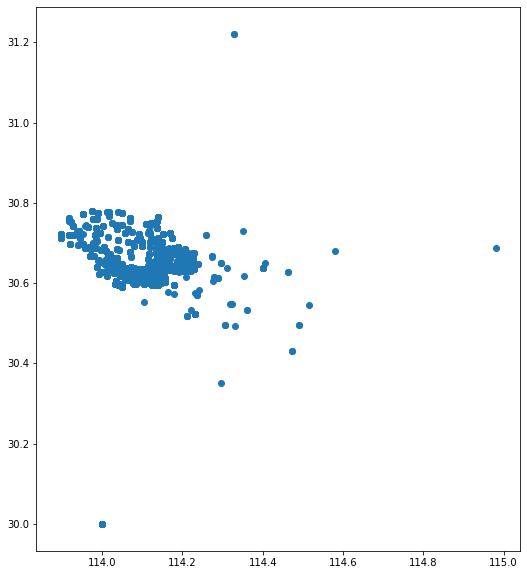

In [23]:
#点显示-所有
jizhan_p.plot(figsize=(10, 10))

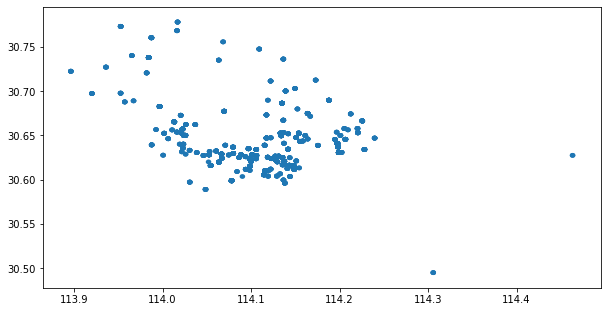

In [21]:
#结果
res.plot(figsize=(10, 10))

In [5]:
1000%100

0